In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
words = open('/content/drive/MyDrive/Colab Notebooks/language-modeling-makemore/names.txt', 'r').read().splitlines()

In [6]:
words[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [7]:
max(len(w) for w in words)

15

In [8]:
# lol
[w for w in words if len(w) == 15]

['muhammadibrahim', 'muhammadmustafa']

In [9]:
[w for w in words if len(w) == 14]

['mariaguadalupe',
 'elizabethgrace',
 'oluwafifehanmi',
 'oluwatimilehin',
 'michaelanthony',
 'alexanderjames']

# bigram language model

only looks at two characters at a time (looking at character 1 and predicting character 2)
very local and simple and weak lol

In [10]:
#counting how often each combination occurs

dict = {}

for w in words[:2]:
  characters = ['<start>'] + list(w) + ['<end>']

  for ch1, ch2 in zip(characters, characters[1:]): # 'sliding' 2 characters at a time over the word
    bigram = (ch1, ch2)
    dict[bigram] = dict.get(bigram, 0) + 1
    print(ch1, ch2)

<start> e
e m
m m
m a
a <end>
<start> o
o l
l i
i v
v i
i a
a <end>


In [11]:
dict

{('<start>', 'e'): 1,
 ('e', 'm'): 1,
 ('m', 'm'): 1,
 ('m', 'a'): 1,
 ('a', '<end>'): 2,
 ('<start>', 'o'): 1,
 ('o', 'l'): 1,
 ('l', 'i'): 1,
 ('i', 'v'): 1,
 ('v', 'i'): 1,
 ('i', 'a'): 1}

In [12]:
#same thing but for all 32k words

dict = {}

for w in words:
  characters = ['<start>'] + list(w) + ['<end>']

  for ch1, ch2 in zip(characters, characters[1:]):
    bigram = (ch1, ch2)
    dict[bigram] = dict.get(bigram, 0) + 1

In [ ]:
dict

## using pytorch: store characters in a 2d array instead of dictionary

In [14]:
import torch

### lookup table from characters to integers

#### v1

In [15]:
N = torch.zeros((28,28), dtype=torch.int32) # 28 cause 26 letters in alphabet + <start> and <end>

In [16]:
chars = sorted(list(set(''.join(words))))# pass the entire dataset as a single string, don't allow duplicate characters, and store in a sorted list

In [17]:
stoi = {s:i for i,s in enumerate(chars)}
stoi['<s>'] = 26
stoi['<e>'] = 27
# stoi

In [18]:
for w in words:
  characters = ['<s>'] + list(w) + ['<e>']

  for ch1, ch2 in zip(characters, characters[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

In [19]:
itos = {i:s for s,i in stoi.items()} # reverse of s-to-i

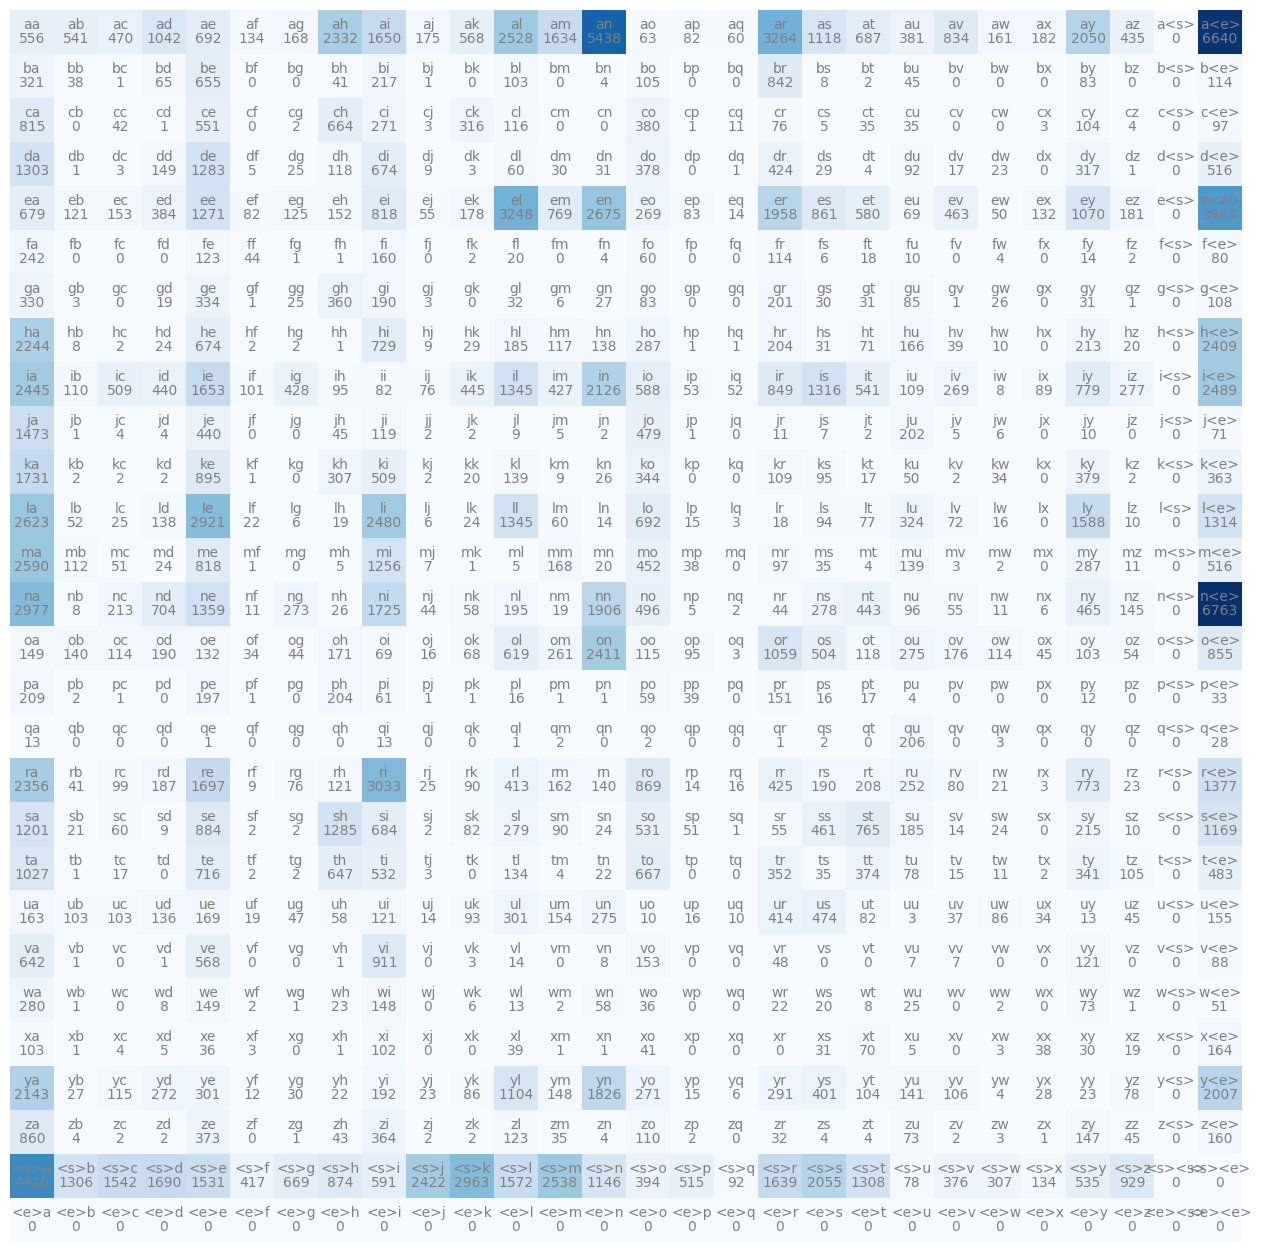

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray') # .item() to get the torch value (int here)
plt.axis('off');

#### v2 improved

without excessive rows and more efficient

In [21]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [22]:
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i,s in enumerate(chars)}
stoi['.'] = 0 # special token ( instead of <e> and <s> )
itos = {i:s for s,i in stoi.items()}

In [23]:
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    N[ix1, ix2] += 1

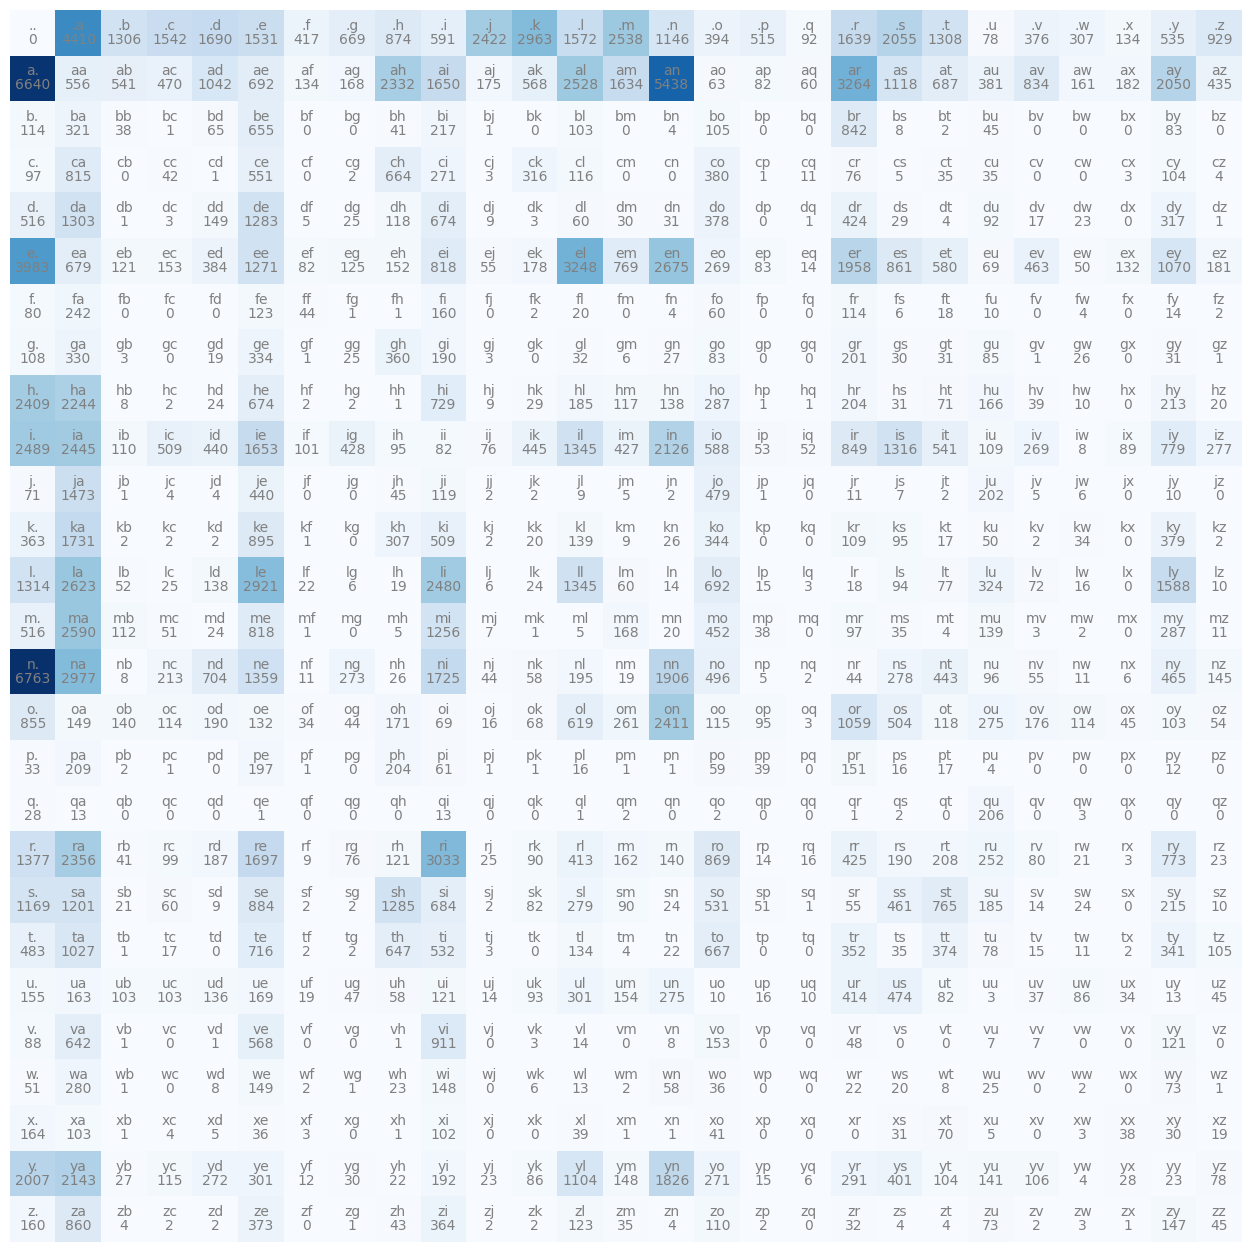

In [24]:
plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

In [25]:
N[0] # nr of times a word starts with (row 1) each character. just turn into probabilities and that's a bigram model??

tensor([   0, 4410, 1306, 1542, 1690, 1531,  417,  669,  874,  591, 2422, 2963,
        1572, 2538, 1146,  394,  515,   92, 1639, 2055, 1308,   78,  376,  307,
         134,  535,  929], dtype=torch.int32)

In [26]:
p = N[0].float()
p = p / p.sum()
p # probability of each word

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [32]:
g = torch.Generator().manual_seed(2147483647)

for i in range(9):

  out = []
  ix = 0 # special token
  while True:
    p = N[ix].float()
    p = p / p.sum()
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
    print(''.join(out))
  print()

j
ju
jun
juni
junid
junide

j
ja
jan
jana
janas
janasa
janasah

p

c
co
con
cony

a

n
nn

k
ko
koh
kohi
kohin

t
to
tol
toli
tolia
tolian

j
ju
jue
juee

